In [71]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

In [72]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [73]:
print('train data dim:', x_train.shape)
print('test data dim:', x_test.shape)

train data dim: (60000, 28, 28)
test data dim: (10000, 28, 28)


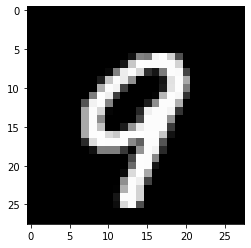

label: 9


In [74]:
rand_num = np.random.randint(60000)
plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
print('label:', y_train[rand_num])

In [75]:
# reshape x_train x_test
x_train = np.reshape(x_train,[-1, 28*28])
x_test = np.reshape(x_test,[-1, 28*28])

In [76]:
# Normalize data by rescaling them to (0,1)
x_train = x_train/255
x_test = x_test/255

In [77]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [78]:
model = Sequential()
# model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer=RandomNormal(0,0.01)))
# model.add(Dense(512, activation='relu', kernel_initializer=RandomNormal(0,0.01)))
model.add(Dense(10, activation='softmax', input_shape=(784,), kernel_initializer= RandomNormal(0,0.01)))

In [79]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics = ['accuracy'])

In [80]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
# model.save('raw_model.h5')|

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 3,
                    verbose = 1,
                    validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 2s 41us/step - loss: 0.8354 - accuracy: 0.8292 - val_loss: 0.5048 - val_accuracy: 0.8778
Epoch 2/3
48000/48000 [==============================] - 2s 37us/step - loss: 0.4857 - accuracy: 0.8768 - val_loss: 0.4148 - val_accuracy: 0.8946
Epoch 3/3
48000/48000 [==============================] - 2s 37us/step - loss: 0.4256 - accuracy: 0.8871 - val_loss: 0.3799 - val_accuracy: 0.9003


In [82]:
te_score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss:', te_score[0])
print('Test accuracy:', te_score[1])

Test Loss: 0.38126405798196794
Test accuracy: 0.8999999761581421


In [70]:

# save model here:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

NameError: name 'model' is not defined

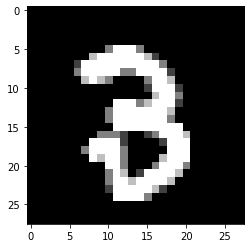

True label: 3
Predicted label: 3


In [25]:

# reload the model here:
model = load_model('mlp.h5')
# generate a random number. (use numpy random.randint)
rand_num = np.random.randint(60000)
img = x_train[rand_num]
img = np.expand_dims(img, axis = 0)
predicted_label =model.predict(img, 1)
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray' )
plt.show()
# print its label
true_label = np.argmax(y_train[rand_num])
predicted_label = np.argmax(predicted_label)
print('True label:', true_label)
print('Predicted label:', predicted_label)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 131us/step - loss: 0.0728 - accuracy: 0.9801 - val_loss: 0.1012 - val_accuracy: 0.9712
Epoch 2/100
48000/48000 [==============================] - 6s 131us/step - loss: 0.0692 - accuracy: 0.9809 - val_loss: 0.0989 - val_accuracy: 0.9718
Epoch 3/100
48000/48000 [==============================] - 6s 133us/step - loss: 0.0653 - accuracy: 0.9825 - val_loss: 0.0977 - val_accuracy: 0.9724
Epoch 00003: early stopping


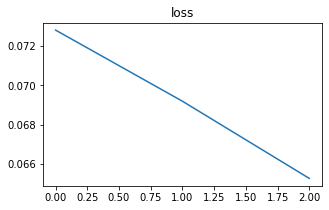

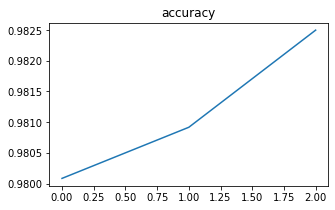

In [28]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, min_delta=0.01, patience = 2, mode= 'min' ),
            keras.callbacks.CSVLogger('log.csv')]
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 100,
                    verbose = 1,
                    validation_split = 0.2,
                    callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');